In [2]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [3]:
# Loading the image
img = cv.imread(f'Sample Image.jpg')
print(img.shape)

(8562, 8497, 3)


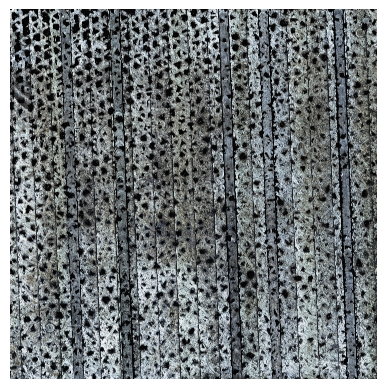

In [4]:
# Showing RGB image 
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(rgb)

In [30]:
# Applying bluring for reducing noise
blur = cv.GaussianBlur(img, (13,13), 0)

# Converting the blur image to grayscale image
gray = cv.cvtColor(blur, cv.COLOR_BGR2GRAY)

# binarizing the image
ret, binary_gray = cv.threshold(gray, 74, 255, cv.THRESH_BINARY)
cv2_imshow(binary_gray)

In [31]:
# Calculating total number of pixel
total_pixel = img.shape[0] * img.shape[1]

# Only 0 and 255 grascale pixels in the image where pixel with 0 grascale value are pore pixels
# Calculating number of pore pixel
pore_pixel = total_pixel - cv.countNonZero(binary_gray)

print(f'Total number of pixel in the image : {total_pixel}')
print(f'Number of pore pixels in the image : {pore_pixel}')

Total number of pixel in the image : 72751314
Number of pore pixels in the image : 23647572


In [32]:
# Calculating Porosity percentage
porosity_percentage = (pore_pixel/total_pixel) * 100
print(f'Porosity percentage : {round(porosity_percentage, 2)}%')

Porosity percentage : 32.5%


### By Morphological operation

In [24]:
import cv2 as cv
import numpy as np

def calculate_porosity(image_path, kernel_size, threshold):
    # Load the image and convert to grayscale image
    image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

    # Apply noise reduction using morphological closing which performs dilation followed by erosion
    kernel = np.ones(kernel_size, np.uint8)
    closed_image = cv.morphologyEx(image, cv.MORPH_CLOSE, kernel)

    # Convert the closed image to a  inverse binary representation
    _, binary_image = cv.threshold(closed_image, threshold, 255, cv.THRESH_BINARY_INV)

    

    # Calculating the number of pore pixels and total pixels
    total_pixels = image.shape[0] * image.shape[1]
    pore_pixels = cv.countNonZero(binary_image)   # As the image is inversed binary image thus, all the non-zero pixels are pore pixels

    # Calculate the percentage porosity
    porosity_percentage = (pore_pixels / total_pixels) * 100

    print(f'Porosity percentage by morphological operation : {round(porosity_percentage, 2)}%')
    cv2_imshow(binary_image)
    return

# providing the image path, kernel size and threshold value and calling the function
image_path = "/content/Sample Image.jpg"  
kernel_size = (7, 7)  # Adjust this kernel size 
threshold = 85  # Adjust this threshold value if needed

porosity = calculate_porosity(image_path, kernel_size, threshold)
porosity


Porosity percentage by morphological operation : 30.08%
